In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv")

In [3]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


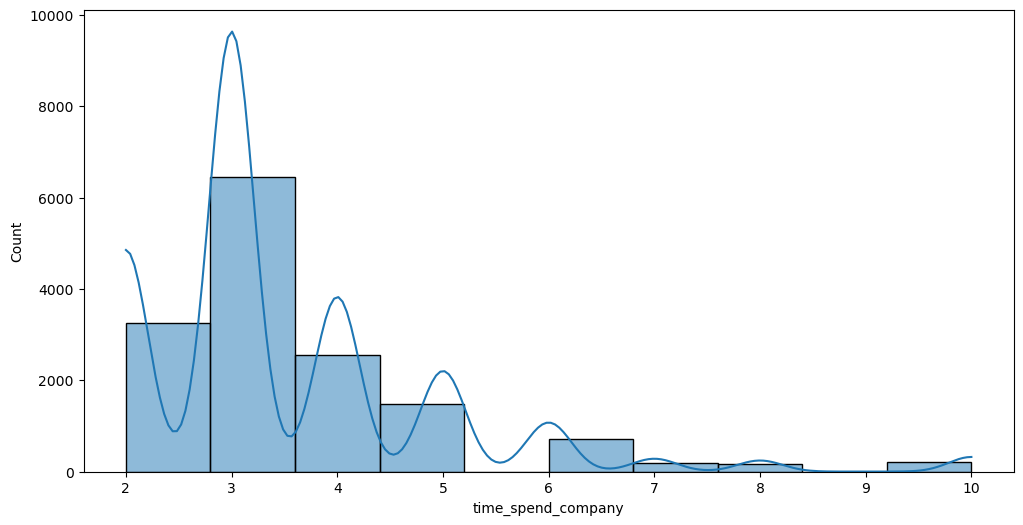

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="time_spend_company", bins=10, kde=True)
plt.show()

In [6]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

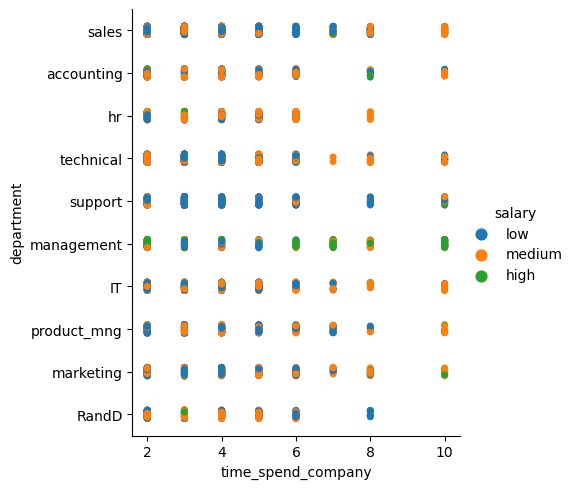

In [8]:
sns.catplot(data=df, x="time_spend_company", y="department", hue="salary")
plt.show()

#### From the above graph it can be analyzed that "HR" and R&D" department employees do not retent more than 8 years.

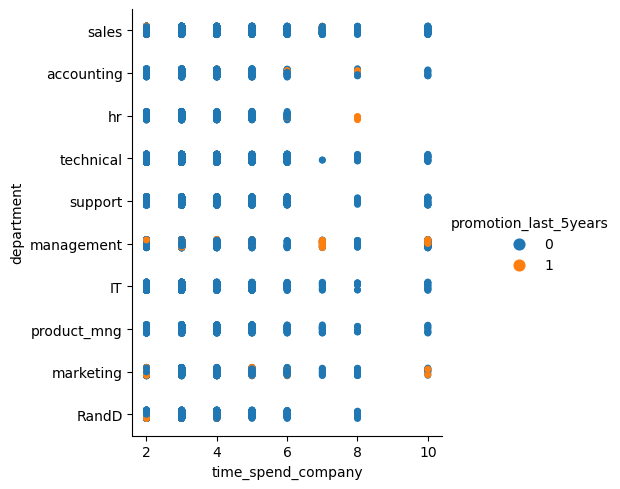

In [9]:
sns.catplot(data=df, x="time_spend_company", y="department", hue="promotion_last_5years")
plt.show()

#### From the above graph it can be analyzed that promotion criteria in the company is less and hence this might be the reason for people leaving the company

## Loading our second dataset that is employee satisfaction data

In [10]:
df_emp_sat = pd.read_excel('Data Practice/employee_satisfaction_evaluation.xlsx', index_col="EMPLOYEE #")

In [11]:
df_emp_sat.head()

,satisfaction_level,last_evaluation
EMPLOYEE #,,
1003,0.38,0.53
1005,0.80,0.86
1486,0.11,0.88
1038,0.72,0.87
1057,0.37,0.52


In [12]:
main_df = df.set_index("employee_id").join(df_emp_sat)
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
main_df.fillna(main_df.mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1732\1234004495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


In [15]:
main_df[main_df.isnull().any(axis=1)]
#removed all missing values and replaced by mean value

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [16]:
main_df = main_df.set_index("employee_id")

In [17]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [18]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


Employees left: 23.81
Employees retained: 76.19


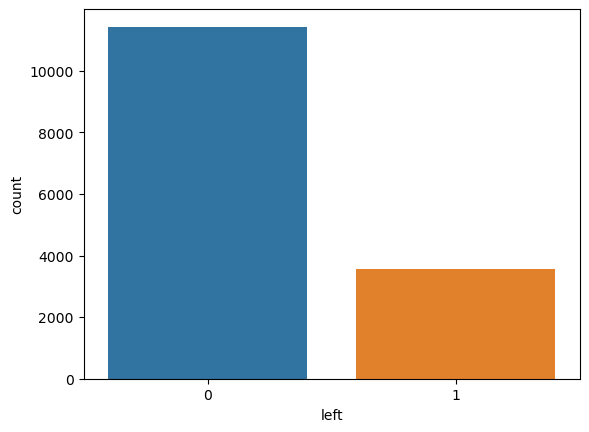

In [19]:
sns.countplot(data=main_df, x="left")
print(f"Employees left: {(round(main_df['left'].value_counts()[1] / len(main_df) * 100, 2))}")
print(f"Employees retained: {100-(round(main_df['left'].value_counts()[1] / len(main_df) * 100, 2))}")

#### From above illustration it can be predicted that 23.81% employee have left

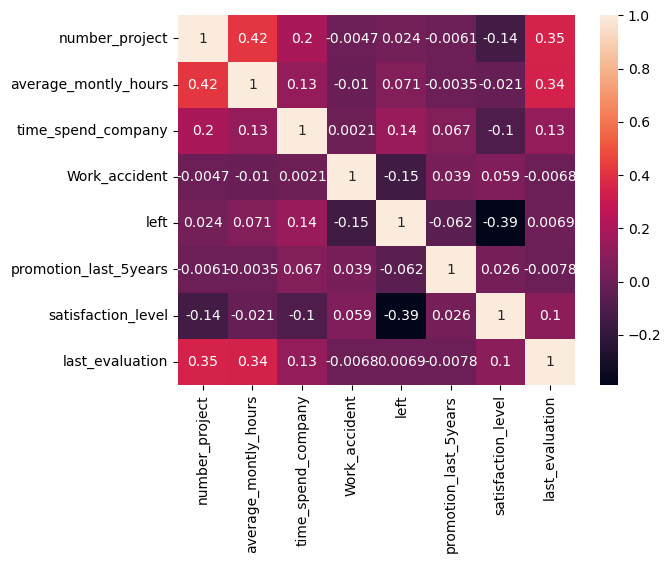

In [20]:
sns.heatmap(main_df.corr(), annot=True)
plt.show()

In [21]:
def max_correlations_sorted(data, percentage=0.3, sorting="ascending"):
    """
    This function is responsible for extract the correlated features based on the provided percentage.
    :param data: correlated data need to be provided having same shape
    :param percentage: Default 0.3, However, you can set any float value to get the max correlations
    :param sorting: Default "ascending". Set "descending" or none.
    :return:
    """

    high_corr_vars = []
    for i in range(len(data)):
        for j in range(i):
            if abs(data.iloc[i, j]) > percentage:
                high_corr_vars.append((data.index[i], data.columns[j], data.iloc[i, j]))

    # Convert the list to a Pandas dataframe
    df_high_corr_vars = pd.DataFrame(high_corr_vars, columns=['Variable 1', 'Variable 2', 'Correlation'])

    if sorting.lower() == "ascending":
        return df_high_corr_vars.sort_values(by='Correlation', ascending=True)
    elif sorting.lower() == "descending":
        return df_high_corr_vars.sort_values(by='Correlation', ascending=False)
    else:
        return df_high_corr_vars

In [22]:
max_correlations_sorted(main_df.corr(), percentage=0.1, sorting="descending")

,Variable 1,Variable 2,Correlation
0,average_montly_hours,number_project,0.417211
8,last_evaluation,number_project,0.348776
9,last_evaluation,average_montly_hours,0.339014
1,time_spend_company,number_project,0.196786
3,left,time_spend_company,0.144822
10,last_evaluation,time_spend_company,0.131078
2,time_spend_company,average_montly_hours,0.127755
11,last_evaluation,satisfaction_level,0.103783
6,satisfaction_level,time_spend_company,-0.101165
5,satisfaction_level,number_project,-0.143895


#### Above are the variable havning highest correlation between them

In [57]:
categorical = ["department", "salary"]
hr = pd.get_dummies(main_df, columns=categorical, drop_first=True)

In [58]:
#Q. How many employeed have left according to dataset?
len(hr.loc[hr["left"] == 1])

3571

## Preparing our datset for machine learning

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [60]:
X = hr.drop('left', axis=1)
y = hr['left']

In [61]:
X

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
employee_id,,,,,,,,,,,,,,,,,,
1003,2,157,3,0,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1005,5,262,6,0,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
1486,7,272,4,0,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
1038,5,223,5,0,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
1057,2,159,3,0,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,0,0.40,0.57,0,0,0,0,0,0,0,1,0,1,0
87673,2,160,3,0,0,0.37,0.48,0,0,0,0,0,0,0,1,0,1,0
87679,2,143,3,0,0,0.37,0.53,0,0,0,0,0,0,0,1,0,1,0


In [62]:
# Splitting ratio of 70:30 = train:test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.587060,0.983762,0.340625,-0.413022,-0.148657,-2.063240,0.721656,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,3.854804,-0.622620,-0.413970,-0.467036,1.029092,-0.872176
1,0.159755,-0.940732,-0.343557,2.421176,-0.148657,-0.175855,-0.213024,-0.233765,-0.232629,-0.222206,4.578694,-0.241151,-0.259417,-0.622620,-0.413970,-0.467036,-0.971730,1.146558
2,-1.458448,-0.940732,-0.343557,-0.413022,-0.148657,-0.898683,-1.381375,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,2.141162,1.029092,-0.872176
3,0.159755,-1.381761,0.340625,-0.413022,-0.148657,1.189488,-0.213024,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,-0.467036,-0.971730,1.146558
4,0.968857,1.244370,1.024807,-0.413022,-0.148657,0.828074,1.481084,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,2.141162,-0.971730,1.146558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.159755,0.903575,-0.343557,-0.413022,-0.148657,-0.376640,1.422667,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,2.415634,-0.467036,1.029092,-0.872176
10495,0.159755,0.642966,2.393172,-0.413022,-0.148657,-0.497112,-0.388277,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,1.606117,-0.413970,-0.467036,-0.971730,1.146558
10496,0.968857,0.963715,-1.027740,-0.413022,-0.148657,0.185560,0.079064,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,2.415634,-0.467036,-0.971730,1.146558
10497,0.159755,0.342264,1.024807,-0.413022,-0.148657,0.707602,1.656337,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,1.606117,-0.413970,-0.467036,1.029092,-0.872176


**As the we need to predict whether employee will retain or not hence it is binary classification problem**

Following alogirthms will be used to train a retention classification model
1. Logistic Regression

In [68]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
predictions = model.predict(X_test)

In [72]:
print(f"Accuracy {accuracy_score(predictions, y_test)} \n")
print(f"Confusion matrix \n\n {confusion_matrix(y_test, predictions)} \n")
print(f"classification Report: {classification_report(y_test, predictions)}")

Accuracy 0.7857777777777778 

Confusion matrix 

 [[3170  258]
 [ 706  366]] 

classification Report:               precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

